In [1]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem import *

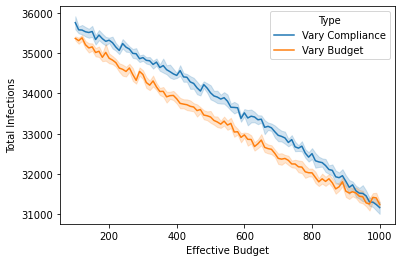

In [17]:
df = pd.read_csv("../output/run_bh8Gt/results.csv")
df1 = pd.read_csv("../output/run_5GQVw/results.csv")
df['Type'] = 'Vary Compliance'
df1['Type'] = 'Vary Budget'

df = pd.concat([df,df1])

df['effective_budget'] = df['compliance_rate'] * df['budget']

sns.lineplot(data=df, x='effective_budget',y='infected_count_known',hue='Type')
plt.ylabel("Total Infections")
plt.xlabel("Effective Budget")
plt.show()

In [2]:
G = load_graph("montgomery")

In [3]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)

In [5]:
#this is how the code is used
for i in range(1):
    state = SimulationState(G, (S,I,R), (S,I,R), 1000, .078,1,1,1,1)
    agent = Random

    while len(state.SIR_known.SIR[1]) != 0:
        print(len(state.SIR_known.SIR[1]))
        to_quarantine = agent(state)
        state.step(to_quarantine)

        #print(state.SIR_known.V1 == state.SIR_real.V1)
        #print("S :" + str(len(state.SIR_known.SIR.S)) + " " + str(len(state.SIR_real.SIR.S)))
        #print("I :" + str(len(state.SIR_known.SIR.I)) + " " + str(len(state.SIR_real.SIR.I)))
        #print("R :" + str(len(state.SIR_known.SIR.R)) + " " + str(len(state.SIR_real.SIR.R)))

        #print()

        #print(len(set(state.SIR_known.SIR.R).difference(set(state.SIR_real.SIR.R))))
        #print(len(set(state.SIR_real.SIR.R).difference(set(state.SIR_known.SIR.R))))

    #print(len(state.SIR_known.SIR[1]))
    #print()
    print(len(state.SIR_known.SIR[2])/75457)
    #print(len(state.SIR_known.SIR[0]),len(state.SIR_real.SIR[0]))

2290
3434
4461
5108
4970
3814
2596
1527
777
341
77
0.4457240547596644


In [189]:
print(len(state.SIR_real.SIR[2])/75457)


0.4757676557509575


In [165]:
print(len(state.SIR_known.SIR[2]))
print(len(state.SIR_real.SIR[2]))

33434
33434


In [27]:
state.SIR_known.quarantined

([], [], [])

In [28]:
len(state.SIR_real.SIR[0] + state.SIR_real.SIR[1] + state.SIR_real.SIR[2])

75457

In [179]:
agents = [NoIntervention, Random, Degree, DepRound, DegGreedy]

In [180]:
for agent in agents:
    state = SimulationState(G, (S,I,R), (S,I,R), 2000, .078,1,1, 1,1)

    while len(state.SIR_known.SIR[1]) != 0:
        to_quarantine = agent(state)
        state.step(to_quarantine)

    print(agent.__name__ + " " + str(len(state.SIR_known.SIR[2])))


NoIntervention 36169
Random 30674
Degree 24299
DegGreedy 21525
DepRound 23785
